In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import os
import numpy as np
import networkx as nx
import itertools
import copy
import datetime, time


from timeit import default_timer as timer
from sklearn.preprocessing import MinMaxScaler
from numpy import array 

In [2]:
# Set the plotting style
# print(plt.style.available)
plt.style.use('seaborn-whitegrid')

In [3]:
# Import the training set
filename = '/Users/Geoff/Desktop/MMAI/CAPSTONE/aragon-all-votes_outcome feature.csv'
df = pd.read_csv(filename)

In [4]:
# Inspect Data
df.head()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result
0,0,2019-01-24T00:05:56.000Z,0x17d38262ceb5317af645a246b0ce6fc4cc3088f6,Yes,249.980000,0x7bffb2e0cf5e1a73bea38565d25821418344269bd144...,249.980000,Yes
1,0,2019-01-24T01:22:45.000Z,0x2b5afa7a939e475a327c763f725d88e8a92ce342,Yes,1510.761544,0x51947df002e5ac8bb2928e083dfd5d57b9e2ac0bee26...,1510.761544,Yes
2,0,2019-01-24T02:44:02.000Z,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,Yes,2987.342012,0x3b62bc58824723f7507f4dfd33b7a9e3ff941a6f7cad...,2987.342012,Yes
3,0,2019-01-24T03:09:50.000Z,0xd472fa32294977196b9ad47e7865e0d737220e32,Yes,5602.726497,0xac26a765b069f9db78c532e07889599e2c855ec9c36b...,5602.726497,Yes
4,0,2019-01-24T03:10:30.000Z,0xd472fa32294977196b9ad47e7865e0d737220e32,Yes,5602.726497,0x7a620bf8e4f80c0646e2cec6bd9cba108a29e8c17c68...,5602.726497,Yes


In [5]:
df['vote'] = df['vote'].eq('Yes').astype(int)

In [6]:
df['Result'] = df['Result'].eq('Yes').astype(int)

In [7]:
# Inspect Data
df.head()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result
0,0,2019-01-24T00:05:56.000Z,0x17d38262ceb5317af645a246b0ce6fc4cc3088f6,1,249.980000,0x7bffb2e0cf5e1a73bea38565d25821418344269bd144...,249.980000,1
1,0,2019-01-24T01:22:45.000Z,0x2b5afa7a939e475a327c763f725d88e8a92ce342,1,1510.761544,0x51947df002e5ac8bb2928e083dfd5d57b9e2ac0bee26...,1510.761544,1
2,0,2019-01-24T02:44:02.000Z,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,1,2987.342012,0x3b62bc58824723f7507f4dfd33b7a9e3ff941a6f7cad...,2987.342012,1
3,0,2019-01-24T03:09:50.000Z,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0xac26a765b069f9db78c532e07889599e2c855ec9c36b...,5602.726497,1
4,0,2019-01-24T03:10:30.000Z,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0x7a620bf8e4f80c0646e2cec6bd9cba108a29e8c17c68...,5602.726497,1


In [8]:
df.tail()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result
634,15,2019-04-26T18:24:39.000Z,0xbfc7cae0fad9b346270ae8fde24827d2d779ef07,0,218.40815,0xb57db8c2008420bc67eb2908c2a9caef201e8abcba5d...,-218.40815,1
635,15,2019-04-26T20:55:28.000Z,0x662127bf82b794a26b7ddb6b495f6a5a20b81738,1,1.00000,0x25a15b7d06e559a93d6719f3399b0b5927c54774862b...,1.00000,1
636,15,2019-04-27T12:45:02.000Z,0x8b6a9b7c8d8ed99ff02314f779f5a1b7e8474548,1,20000.00000,0x6cbfacf247cc2b1ac87e791d78de6ed05790b2681023...,20000.00000,1
637,15,2019-04-27T13:41:54.000Z,0xd8265cc1d176a0d734834a0f60d9d2d53bae66f6,1,792191.00000,0x7f92999ef067bb194d92699c6faf3c0111d9791bafdd...,792191.00000,1
638,15,2019-04-27T14:25:04.000Z,0x1dffdb114e58baedbd25290a1efffa9fc3726d1f,1,3000.00000,0x6181d270f8d2d022fd5d7bee74ead729255d568e21a3...,3000.00000,1


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

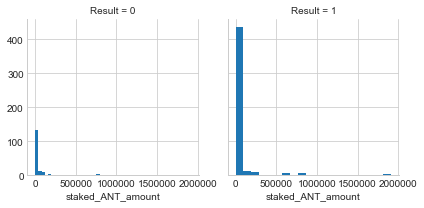

In [10]:
g = sns.FacetGrid(df, col='Result')
g.map(plt.hist, 'staked_ANT_amount', bins=20)

In [11]:
df.dtypes

voting_number          int64
timestamp             object
voter                 object
vote                   int64
staked_ANT_amount    float64
tx                    object
Vote Weight          float64
Result                 int64
dtype: object

In [12]:
df['timestamp'] =  pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

In [13]:
df.dtypes

voting_number                 int64
timestamp            datetime64[ns]
voter                        object
vote                          int64
staked_ANT_amount           float64
tx                           object
Vote Weight                 float64
Result                        int64
dtype: object

In [14]:
df['timestamp'] = df['timestamp'].values.astype(np.float)

In [15]:
df.dtypes

voting_number          int64
timestamp            float64
voter                 object
vote                   int64
staked_ANT_amount    float64
tx                    object
Vote Weight          float64
Result                 int64
dtype: object

In [16]:
df.head()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result
0,0,1.548288e+18,0x17d38262ceb5317af645a246b0ce6fc4cc3088f6,1,249.980000,0x7bffb2e0cf5e1a73bea38565d25821418344269bd144...,249.980000,1
1,0,1.548293e+18,0x2b5afa7a939e475a327c763f725d88e8a92ce342,1,1510.761544,0x51947df002e5ac8bb2928e083dfd5d57b9e2ac0bee26...,1510.761544,1
2,0,1.548298e+18,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,1,2987.342012,0x3b62bc58824723f7507f4dfd33b7a9e3ff941a6f7cad...,2987.342012,1
3,0,1.548299e+18,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0xac26a765b069f9db78c532e07889599e2c855ec9c36b...,5602.726497,1
4,0,1.548299e+18,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0x7a620bf8e4f80c0646e2cec6bd9cba108a29e8c17c68...,5602.726497,1


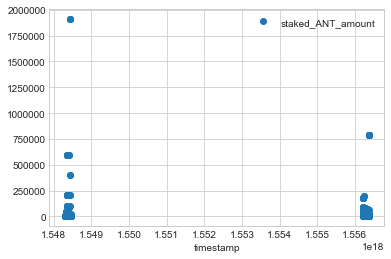

In [17]:
df.plot(x='timestamp', y='staked_ANT_amount', style='o')

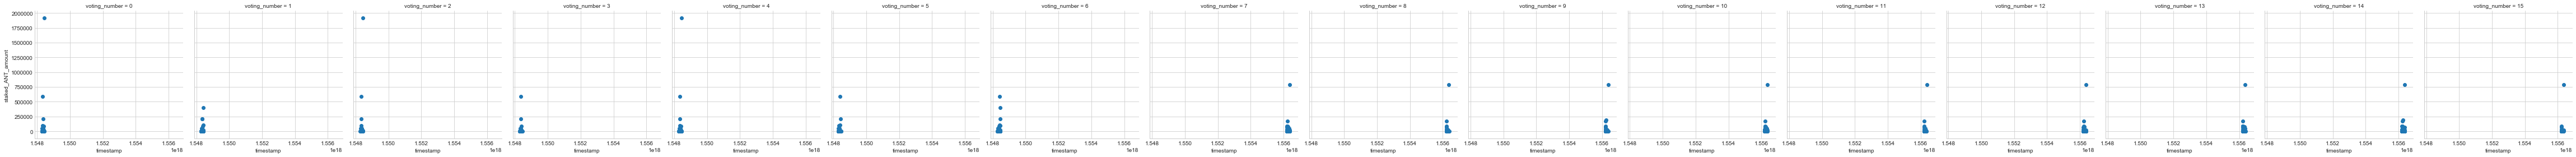

In [18]:
graph = sns.FacetGrid(df, col = "voting_number", height=4)
graph.map(plt.scatter,"timestamp","staked_ANT_amount")

In [19]:
#group by vote 
df_vote  = df.groupby('voting_number')
print(type(df_vote))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [20]:
#normalise timestamps across groups

df['timestamp_norm'] = df.groupby('voting_number')['timestamp'].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [21]:
df.head()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result,timestamp_norm
0,0,1.548288e+18,0x17d38262ceb5317af645a246b0ce6fc4cc3088f6,1,249.980000,0x7bffb2e0cf5e1a73bea38565d25821418344269bd144...,249.980000,1,0.000000
1,0,1.548293e+18,0x2b5afa7a939e475a327c763f725d88e8a92ce342,1,1510.761544,0x51947df002e5ac8bb2928e083dfd5d57b9e2ac0bee26...,1510.761544,1,0.028919
2,0,1.548298e+18,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,1,2987.342012,0x3b62bc58824723f7507f4dfd33b7a9e3ff941a6f7cad...,2987.342012,1,0.059519
3,0,1.548299e+18,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0xac26a765b069f9db78c532e07889599e2c855ec9c36b...,5602.726497,1,0.069232
4,0,1.548299e+18,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0x7a620bf8e4f80c0646e2cec6bd9cba108a29e8c17c68...,5602.726497,1,0.069483


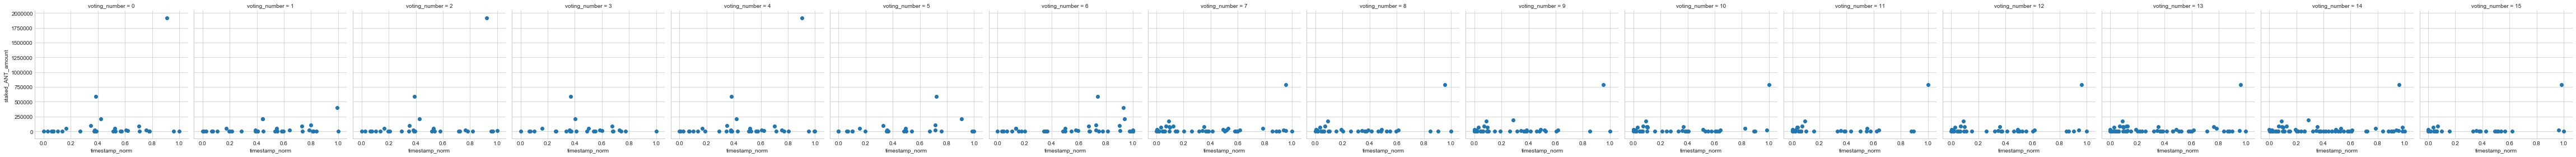

In [22]:
graph = sns.FacetGrid(df, col = "voting_number", height=4)
graph.map(plt.scatter,"timestamp_norm","staked_ANT_amount")

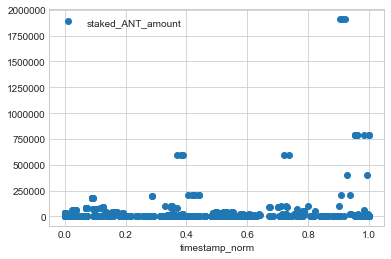

In [23]:
df.plot(x='timestamp_norm', y='staked_ANT_amount', style='o')


In [24]:
from sklearn.cluster import KMeans

In [25]:
vote_cluster = df[['timestamp_norm','staked_ANT_amount']]

In [26]:
vote_cluster.head()

,timestamp_norm,staked_ANT_amount
0,0.000000,249.980000
1,0.028919,1510.761544
2,0.059519,2987.342012
3,0.069232,5602.726497
4,0.069483,5602.726497


In [27]:
df['staked_norm'] = df.groupby('voting_number')['staked_ANT_amount'].apply(lambda x: (x-x.min())/(x.max()-x.min()))

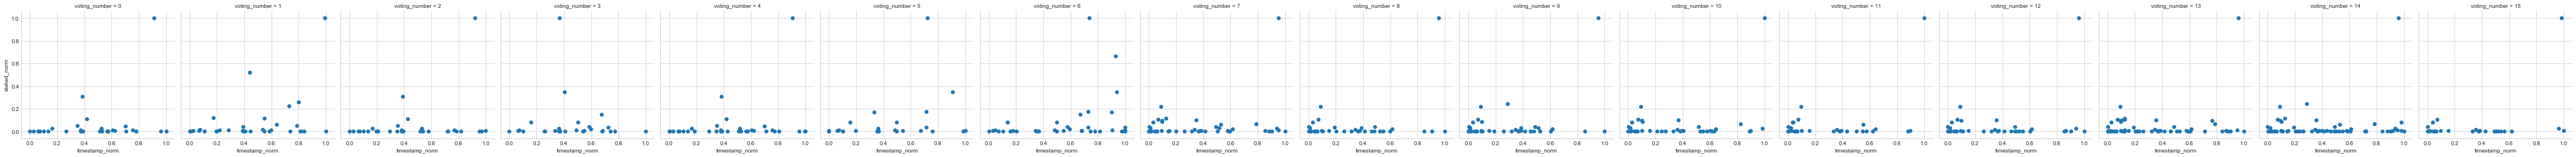

In [28]:
graph = sns.FacetGrid(df, col = "voting_number", height=4)
graph.map(plt.scatter,"timestamp_norm","staked_norm")

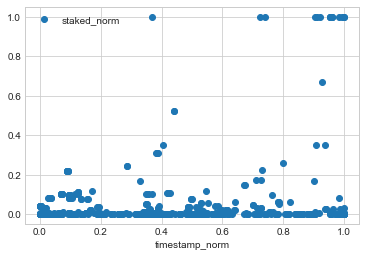

In [29]:
df.plot(x='timestamp_norm', y='staked_norm', style='o')

In [30]:
votes = df[['timestamp_norm','staked_norm']]

In [31]:
votes.head()

,timestamp_norm,staked_norm
0,0.000000,0.000131
1,0.028919,0.000790
2,0.059519,0.001561
3,0.069232,0.002929
4,0.069483,0.002929


In [32]:
#create kmeans object 
kmeans_1 = KMeans(
    n_clusters=1, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_1.fit(votes)

#print model intertia
print(kmeans_1.inertia_)

78.74233004115283


In [33]:
#create kmeans object 
kmeans_2 = KMeans(
    n_clusters=2, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_2.fit(votes)

#print model intertia
print(kmeans_2.inertia_)

33.16928290627622


In [34]:
#create kmeans object 
kmeans_3 = KMeans(
    n_clusters=3, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_3.fit(votes)

#print model intertia
print(kmeans_3.inertia_)

18.1147636396341


In [35]:
#create kmeans object 
kmeans_4 = KMeans(
    n_clusters=4, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_4.fit(votes)

#print model intertia
print(kmeans_4.inertia_)

7.476667505147999


In [36]:
#create kmeans object 
kmeans_5 = KMeans(
    n_clusters=5, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_5.fit(votes)

#print model intertia
print(kmeans_5.inertia_)

5.2435889599341845


In [37]:
#create kmeans object 
kmeans_6 = KMeans(
    n_clusters=6, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_6.fit(votes)

#print model intertia
print(kmeans_6.inertia_)

4.444884421258443


In [38]:
#create kmeans object 
kmeans_7 = KMeans(
    n_clusters=7, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_7.fit(votes)

#print model intertia
print(kmeans_7.inertia_)

3.7007606669538102


In [39]:
#create kmeans object 
kmeans_8 = KMeans(
    n_clusters=8, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_8.fit(votes)

#print model intertia
print(kmeans_8.inertia_)

2.846200042926898


In [40]:
#create kmeans object 
kmeans_9 = KMeans(
    n_clusters=9, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_9.fit(votes)

#print model intertia
print(kmeans_9.inertia_)

2.380902858707782


In [41]:
#create kmeans object 
kmeans_10 = KMeans(
    n_clusters=10, init = 'random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=8)

#fit kmeans object to data
kmeans_10.fit(votes)

#print model intertia
print(kmeans_10.inertia_)

2.164820037563424


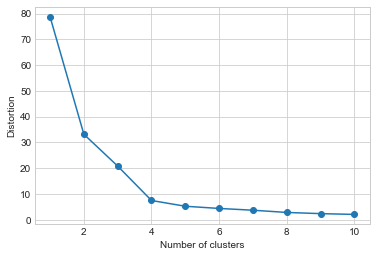

In [42]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(votes)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [43]:
###KMEANS v2 (Adapted from https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) 
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='random', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(votes)

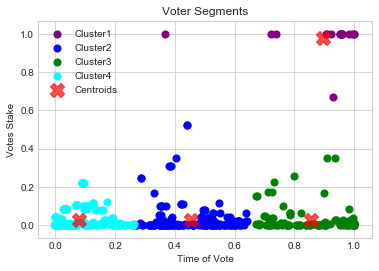

In [46]:
#Visualizing the clusters for k=4
plt.scatter(votes.iloc[y_means==0,0],votes.iloc[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(votes.iloc[y_means==1,0],votes.iloc[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(votes.iloc[y_means==2,0],votes.iloc[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(votes.iloc[y_means==3,0],votes.iloc[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='X', c='red', alpha=0.7, label='Centroids')
plt.title('Voter Segments')
plt.xlabel('Time of Vote')
plt.ylabel('Votes Stake')
plt.legend()
plt.show()

In [48]:
df['cluster'] = pd.Series(y_means, index = df.index)

In [49]:
df.head()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result,timestamp_norm,staked_norm,cluster
0,0,1.548288e+18,0x17d38262ceb5317af645a246b0ce6fc4cc3088f6,1,249.980000,0x7bffb2e0cf5e1a73bea38565d25821418344269bd144...,249.980000,1,0.000000,0.000131,3
1,0,1.548293e+18,0x2b5afa7a939e475a327c763f725d88e8a92ce342,1,1510.761544,0x51947df002e5ac8bb2928e083dfd5d57b9e2ac0bee26...,1510.761544,1,0.028919,0.000790,3
2,0,1.548298e+18,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,1,2987.342012,0x3b62bc58824723f7507f4dfd33b7a9e3ff941a6f7cad...,2987.342012,1,0.059519,0.001561,3
3,0,1.548299e+18,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0xac26a765b069f9db78c532e07889599e2c855ec9c36b...,5602.726497,1,0.069232,0.002929,3
4,0,1.548299e+18,0xd472fa32294977196b9ad47e7865e0d737220e32,1,5602.726497,0x7a620bf8e4f80c0646e2cec6bd9cba108a29e8c17c68...,5602.726497,1,0.069483,0.002929,3


In [50]:
df.tail()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx,Vote Weight,Result,timestamp_norm,staked_norm,cluster
634,15,1.556303e+18,0xbfc7cae0fad9b346270ae8fde24827d2d779ef07,0,218.40815,0xb57db8c2008420bc67eb2908c2a9caef201e8abcba5d...,-218.40815,1,0.564496,0.000276,1
635,15,1.556312e+18,0x662127bf82b794a26b7ddb6b495f6a5a20b81738,1,1.00000,0x25a15b7d06e559a93d6719f3399b0b5927c54774862b...,1.00000,1,0.619211,0.000001,1
636,15,1.556369e+18,0x8b6a9b7c8d8ed99ff02314f779f5a1b7e8474548,1,20000.00000,0x6cbfacf247cc2b1ac87e791d78de6ed05790b2681023...,20000.00000,1,0.963708,0.025246,2
637,15,1.556373e+18,0xd8265cc1d176a0d734834a0f60d9d2d53bae66f6,1,792191.00000,0x7f92999ef067bb194d92699c6faf3c0111d9791bafdd...,792191.00000,1,0.984339,1.000000,0
638,15,1.556375e+18,0x1dffdb114e58baedbd25290a1efffa9fc3726d1f,1,3000.00000,0x6181d270f8d2d022fd5d7bee74ead729255d568e21a3...,3000.00000,1,1.000000,0.003787,2


In [51]:
df.to_csv(r'/Users/Geoff/Desktop/MMAI/CAPSTONE/aragon-all-votes_outcome featurev3.csv')